In [2]:
# preamble to be able to run notebooks in Jupyter and Colab
try:
    from google.colab import drive
    import sys
    
    drive.mount('/content/drive')
    notes_home = "/content/drive/Shared drives/CSC310/ds/notes/"
    user_home = "/content/drive/My Drive/"
    
    sys.path.insert(1,notes_home) # let the notebook access the notes folder

except ModuleNotFoundError:
    notes_home = "" # running native Jupyter environment -- notes home is the same as the notebook
    user_home = ""  # under Jupyter we assume the user directory is the same as the notebook

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Evaluating Models

Learning Curves

* It can be shown that *any model* can learn its training data perfectly - “memorize it”.  That is what the blue curve shows below. Any model can achieve a perfect score on the training data as long as it is allowed to be complex enough. Maximum complexity: the model has memorized the entire dataset.

* But memorizing is not the same as learning inherent patterns and use those patterns to make predictions!  Memorization is extremely bad at predicting future outcomes.  See what happens to the red line below as the model starts to memorize the dataset -- the score actually falls!

> Memorization does not generalize well!
    


If we train a model using *training data* and then apply the model to a *validation/test data set* then we obtain these following typical curves:

<!-- ![model curves](assets/model-performance-curves.png) -->

<img src="https://github.com/lutzhamel/ds/raw/master/notes/assets/train-test-curves.png"  height="250" width="400">

Note: Validation data is data that the model has not seen yet.

Simply put:

1. Undertrained models make a lot of errors on validation data because they have not learned any of the patterns yet.

2. Overtrained models (models that have memorized their training data) make a lot of errors on validation because memorization is extremely bad at predicting the future outcomes.

3. The best models make a trade-off between errors and recognizing important patterns. Notice that for the best models the training score is not 100%!

> In order to find the best model we have to search its *parameter space* in order to find just the right complexity level.

**Note**: The code in this notebook takes advantage of the `random_state` parameter in a lot of scikit-learn functions.  This is only done to keep the results of this notebook deterministic.  This variable is strictly not necessary in general applications.

# Train and Test (Validate)

In order to simulate the fact that a model is not able to see all possible data points during training we split our training data into two parts:

* Training data
* Testing (validation) data

We will train our model on the training data as before but we will now test the model performance on the testing data which the model has not seen yet.

> That is, we force the model to make some generalizations.


# Decision Trees: Train and Test

In [3]:
import pandas as pd
from assets.treeviz import tree_print
from sklearn import tree
from sklearn.metrics import accuracy_score
# sklearn provides manipulation of training sets
# here we do train/test split
from sklearn.model_selection import train_test_split

# The Iris Data Set

In [4]:
# set up our sklearn data shape for the iris data
df = pd.read_csv(notes_home+"assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# split the data - 70% training 30% testing
datasets = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=2)
X_train, X_test, y_train, y_test = datasets

Let's see if we can recreate the results given by the learning curves above.

### Low Complexity Tree

In [5]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if Petal.Length =< 2.350000023841858: 
  |then setosa
  |else virginica
<->
Tree Depth:  1
Train Accuracy: 0.67
Test Accuracy: 0.67


### Medium Complexity Tree

In [6]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if Petal.Length =< 2.350000023841858: 
  |then setosa
  |else if Petal.Width =< 1.6500000357627869: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then versicolor
  |  |  |else virginica
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then virginica
  |  |  |else virginica
<------->
Tree Depth:  3
Train Accuracy: 0.98
Test Accuracy: 0.98


### High Complexity Tree

In [7]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if Petal.Width =< 0.800000011920929: 
  |then setosa
  |else if Petal.Width =< 1.6500000357627869: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then versicolor
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Width =< 3.100000023841858: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |  |else virginica
<---------->
Tree Depth:  4
Train Accuracy: 1.00
Test Accuracy: 0.96


# Wisconsin Breast Cancer Dataset

The data set is available at <a href="https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)">UCI</a>.
The data set describes benign and malignent tumors based on image measurements.

In [8]:
# set up our sklearn data shape for the iris data
df = pd.read_csv(notes_home+"assets/wdbc.csv")
print(df.shape)
df.head()

(569, 32)


,ID,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3,Diagnosis
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,M
1,2,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,M
2,3,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,M
3,4,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,M
4,5,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,M


In [9]:
# see if our data set is balanced
df['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

In [10]:
X  = df.drop(['ID','Diagnosis'],axis=1)
y = df['Diagnosis']

# split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=1)

### Low Complexity Tree

In [11]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=1, random_state=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if perimeter3 =< 104.10000228881836: 
  |then B
  |else M
<->
Tree Depth:  1
Train Accuracy: 0.94
Test Accuracy: 0.85


### Medium Complexity Tree

In [12]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=2)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {:3.2f}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {:3.2f}".format(accuracy_score(y_test, y_test_model)))

if perimeter3 =< 104.10000228881836: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then B
  |  |  |else if concavity2 =< 0.01723999995738268: 
  |  |  |  |then M
  |  |  |  |else B
  |  |else if texture3 =< 29.454999923706055: 
  |  |  |then B
  |  |  |else M
  |else if concave_points3 =< 0.14159999787807465: 
  |  |then if texture3 =< 19.90999984741211: 
  |  |  |then B
  |  |  |else if area2 =< 35.290000915527344: 
  |  |  |  |then B
  |  |  |  |else M
  |  |else if radius3 =< 15.87000036239624: 
  |  |  |then if smoothness3 =< 0.1388000026345253: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
<---------->
Tree Depth:  4
Train Accuracy: 0.98
Test Accuracy: 0.92


### High Complexity Tree

In [13]:
# set up the tree model object - limit the complexity to put us somewhere in the middle of the graph.
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=None, random_state=1)

# fit the model on the training set of data
model.fit(X_train, y_train)
tree_print(model,X)

# Train results: evaluate the model on the testing set of data
y_train_model = model.predict(X_train)
print("Train Accuracy: {}".format(accuracy_score(y_train, y_train_model)))

# Test results: evaluate the model on the testing set of data
y_test_model = model.predict(X_test)
print("Test Accuracy: {}".format(accuracy_score(y_test, y_test_model)))

if perimeter3 =< 104.10000228881836: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then B
  |  |  |else if smoothness3 =< 0.10676500201225281: 
  |  |  |  |then B
  |  |  |  |else M
  |  |else if texture3 =< 29.454999923706055: 
  |  |  |then B
  |  |  |else M
  |else if concave_points3 =< 0.14159999787807465: 
  |  |then if texture3 =< 19.90999984741211: 
  |  |  |then B
  |  |  |else if radius2 =< 0.37575000524520874: 
  |  |  |  |then if perimeter2 =< 2.0149999856948853: 
  |  |  |  |  |then if concave_points3 =< 0.08526499941945076: 
  |  |  |  |  |  |then B
  |  |  |  |  |  |else M
  |  |  |  |  |else B
  |  |  |  |else M
  |  |else if radius3 =< 15.87000036239624: 
  |  |  |then if smoothness3 =< 0.1388000026345253: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
<---------------->
Tree Depth:  6
Train Accuracy: 1.0
Test Accuracy: 0.9122807017543859


# Model Search

From our discussion above it is clear that in order to find the best model we have to perform a **search** over the model space using parameters that dictate the complexity of the model.

Demo: try this with the decision tree on the iris data set.


# Train and Test

We have already seen that just using a training set for model evaluation does not work!

Our solution was to split the training data into a training and a test/validation set.

<img src="https://raw.githubusercontent.com/lutzhamel/ds/master/notes/assets/train-test-data.png" height="200" width="400">

# Problem!

* Train-testing relies on randomly splitting the training data into two parts.

* If this split just happens to be a ‘bad’ split our results might be biased,

**Solution:** cross-validation


# Cross-Validation

* In cross-validation we switch the roles of the two sets
* We build and evaluate a model on each trial and then take the average
* This will eliminate a lot of the bias

<img src="https://raw.githubusercontent.com/lutzhamel/ds/master/notes/assets/2fold-xval.png" height="200" width="400">


BUT, what if is the split was really bad: e.g. one of the sets does not contain any examples of one of the classes.

**Solution:** create more trials - *n-fold cross-validation*

As a solution to a single bad split -- perform the split multiple times -- then train and test -- take the average

Example: 
* 5-fold CV - split the training data into 5 partitions (folds)
* Use each fold as a test/validation set and the other folds as training set
* Multiple splits - even if one is bad it will be balanced out by the others.

<img src="https://raw.githubusercontent.com/lutzhamel/ds/master/notes/assets/5fold-xval.png" height="200" width="400">

**Note**: 5-CV is interesting because each trial essentially has an 80-20 split: 80% of the data for training and 20% for testing.

**Note**: We have to train and test models five times in 5-CV.

# Model Search

Once we switch to a cross-validation approach our model search becomes something different.  Instead of search over the model space we search over 
the **parameter space** for the best set of parameters.

<img src="https://github.com/lutzhamel/ds/raw/master/notes/assets/cross-validated-curve.png"  height="250" width="400">

This is due to the fact that cross-validation builds **multiple** models and the cross-validated performance is the **mean performance** of the models built on the various folds.

Searching over the parameter space is called **grid search**.


In [14]:
# cross-validation Iris
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score

# get data
df = pd.read_csv(notes_home+"assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# set up the model
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.93 0.97 0.90 0.87 1.00]
Accuracy: 0.93


In [15]:
# cross-validation WDBC
import pandas as pd
import numpy as np
np.set_printoptions(formatter={'float_kind':"{:3.2f}".format})
from sklearn import tree
# grab cross validation code
from sklearn.model_selection import cross_val_score

# get data
df = pd.read_csv(notes_home+"assets/wdbc.csv")
X  = df.drop(['ID','Diagnosis'],axis=1)
y = df['Diagnosis']

# set up the model
model = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

# do the 5-fold cross validation
scores = cross_val_score(model, X, y, cv=5)
print("Fold Accuracies: {}".format(scores))
print("Accuracy: {:3.2f}".format(scores.mean()))

Fold Accuracies: [0.90 0.91 0.96 0.94 0.96]
Accuracy: 0.93


# Model Evaluation - the Grid Search

You probably figured out by now that the only way to find the best model for a particular dataset is to search for it by trying different (hyper-)parameters that control the complexity of the models.  Therefore:

* Finding the best model involves searching for (hyper-)parameter values that give you the best testing/cross-validation accuracy.
* This is usually referred to as the *grid search*.



Sklearn helps us do that efficiently:

Sklearn has a built-in grid search that can optimize the model parameters.  In our case the decision tree classifiere has two parameters: criterion and depth. The grid search will find the optimal value for both of these parameters. The grid search function will return two things:

1. the optimal parameter set
2. the optimal classifier

Consider,

In [16]:
# Grid search with cross-validation for iris dataset
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# get data
df = pd.read_csv(notes_home+"assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# setting up grid search
model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
grid.fit(X,y)

# print out best parameters
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute the accuracy       
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)

# print accuracy          
print("Accuracy: {:3.2f}".format(acc))

Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best tree:
if Petal.Width =< 0.800000011920929: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then if Petal.Width =< 1.6500000357627869: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Length =< 5.950000047683716: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else virginica
<---------->
Tree Depth:  4
Accuracy: 0.99


In [17]:
# Grid search with cross-validation for wisconsin breast cancer dataset
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# get data
df = pd.read_csv(notes_home+"assets/wdbc.csv")
X  = df.drop(['ID','Diagnosis'],axis=1)
y = df['Diagnosis']

# setting up grid search
model = model = tree.DecisionTreeClassifier()
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# Get the accuracy
# Evaluate the tree
# predicting        
predict_y = grid.best_estimator_.predict(X)

# accuracy          
print("Accuracy: {:3.2f}".format(accuracy_score(y, predict_y)))

Best parameters: {'criterion': 'entropy', 'max_depth': 8}
Best tree:
if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then if texture3 =< 30.145000457763672: 
  |  |  |  |then B
  |  |  |  |else if fractal_dimension2 =< 0.0013144999975338578: 
  |  |  |  |  |then M
  |  |  |  |  |else if smoothness3 =< 0.14124999940395355: 
  |  |  |  |  |  |then B
  |  |  |  |  |  |else if area1 =< 456.34999084472656: 
  |  |  |  |  |  |  |then B
  |  |  |  |  |  |  |else M
  |  |  |else if concavity1 =< 0.02898500021547079: 
  |  |  |  |then M
  |  |  |  |else B
  |  |else if texture3 =< 27.575000762939453: 
  |  |  |then if symmetry3 =< 0.35785000026226044: 
  |  |  |  |then B
  |  |  |  |else if area2 =< 20.18000030517578: 
  |  |  |  |  |then B
  |  |  |  |  |else M
  |  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then if smoothness3 =< 0.13610000163316727: 
  |  |  |then if texture3 =< 

**Note**: Grid search is computationally very expensive! In the two cases above we had two types of splitting criteria (gini and entropy) and we had 10 levels of complexity.  In addition we performed 5-CV for each parameter combination.  Doing the math we built $2{\times}10{\times}5 = 100$ models for each grid search.

# Model Accuracy Reexamined

Consider a classification problem with two classes, then we observe the following outcomes of a prediction of a suitable classification model:

>true positive (TP) -- predicted positive coincides with actual positive

>true negative (TN) -- predicted negative coincides with actual negative

>false positive (FP), Type I error -- predicted positive but actual negative

>false negative (FN), Type II error -- predicted negative but actual positive

Two types of errors possible!


* We can arrange the predictions in a matrix form
* Errors will show up as values outside the major diagonal

<img src="https://raw.githubusercontent.com/lutzhamel/ds/master/notes/assets/confusion2.png" height="400" width="800">

# The Wisconsin Breast Cancer Data Set

Let's apply everything we have learned so far: build the best model, and then evaluate it.

In [25]:
# set up
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

# get data 
df = pd.read_csv(notes_home+"assets/wdbc.csv")

# create our sklearn data
X  = df.drop(['ID','Diagnosis'],axis=1)
y = df['Diagnosis']

# setting up grid search using 5-fold CV
model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)),
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
null = grid.fit(X,y)

# print out what we found
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute and print the accuracy
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)
print("Accuracy: {:3.2f}".format(acc))

# build and print the confusion matrix 
labels = ['M','B']
cm = confusion_matrix(y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Best parameters: {'criterion': 'entropy', 'max_depth': 4}
Best tree:
if perimeter3 =< 105.95000076293945: 
  |then if concave_points3 =< 0.13505000621080399: 
  |  |then if area2 =< 48.97500038146973: 
  |  |  |then if texture3 =< 30.145000457763672: 
  |  |  |  |then B
  |  |  |  |else B
  |  |  |else if compactness3 =< 0.08476000279188156: 
  |  |  |  |then M
  |  |  |  |else B
  |  |else if texture3 =< 27.575000762939453: 
  |  |  |then if symmetry3 =< 0.35785000026226044: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
  |else if perimeter3 =< 117.44999694824219: 
  |  |then if smoothness3 =< 0.13610000163316727: 
  |  |  |then if texture3 =< 25.670000076293945: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else if texture1 =< 13.420000076293945: 
  |  |  |  |then B
  |  |  |  |else M
  |  |else if smoothness3 =< 0.09975999966263771: 
  |  |  |then if fractal_dimension1 =< 0.053039999678730965: 
  |  |  |  |then B
  |  |  |  |else M
  |  |  |else M
<---------->
Tree Depth:

In [19]:
y.value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

Taking our top three features from our decision tree and creating a scatter plot.

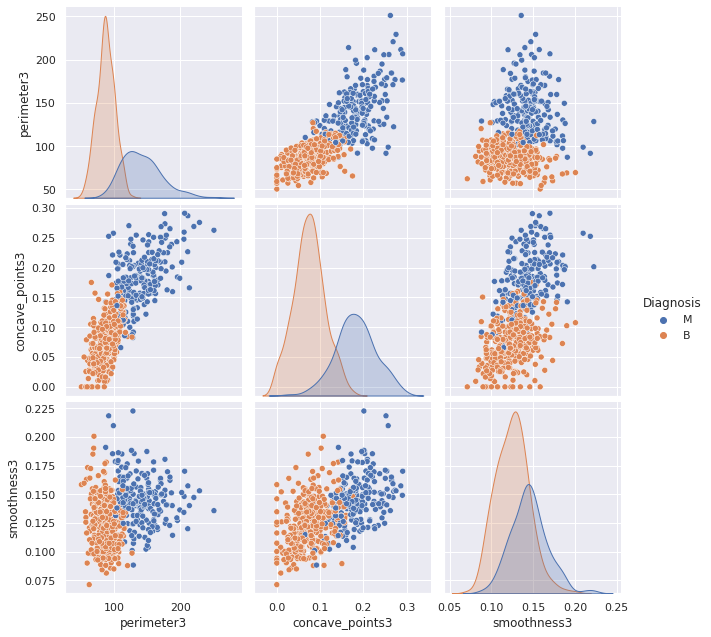

In [26]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Diagnosis', height=3, vars=["perimeter3", "concave_points3", "smoothness3"])

# The Iris Data Set

Here we are building a three way confusion matrix because we have three classification labels.  We apply our grid search to find the best model

In [28]:
# Grid search with cross-validation for iris dataset
import pandas as pd
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

# get data
df = pd.read_csv(notes_home+"assets/iris.csv")
X  = df.drop(['id','Species'],axis=1)
y = df['Species']

# setting up grid search
model = model = tree.DecisionTreeClassifier(random_state=1)
param_grid = {
    'max_depth': list(range(1,11)), # search 1..10
    'criterion': ['entropy', 'gini']
    }
grid = GridSearchCV(model, param_grid, cv=5)

# performing grid search 
grid.fit(X,y)

# print out best parameters
print("Best parameters: {}".format(grid.best_params_))

# print out the best model
print("Best tree:")
tree_print(grid.best_estimator_,X)

# compute the accuracy       
predict_y = grid.best_estimator_.predict(X)
acc = accuracy_score(y, predict_y)

# print accuracy          
print("Accuracy: {:3.2f}".format(acc))

# build and print the confusion matrix 
labels = ['setosa','versicolor','virginica']
cm = confusion_matrix(y, predict_y, labels=labels)
cm_df = pd.DataFrame(cm, index=labels, columns=labels)
print("Confusion Matrix:\n{}".format(cm_df))

Best parameters: {'criterion': 'gini', 'max_depth': 4}
Best tree:
if Petal.Width =< 0.800000011920929: 
  |then setosa
  |else if Petal.Width =< 1.75: 
  |  |then if Petal.Length =< 4.950000047683716: 
  |  |  |then if Petal.Width =< 1.6500000357627869: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else if Petal.Width =< 1.550000011920929: 
  |  |  |  |then virginica
  |  |  |  |else versicolor
  |  |else if Petal.Length =< 4.8500001430511475: 
  |  |  |then if Sepal.Length =< 5.950000047683716: 
  |  |  |  |then versicolor
  |  |  |  |else virginica
  |  |  |else virginica
<---------->
Tree Depth:  4
Accuracy: 0.99
Confusion Matrix:
            setosa  versicolor  virginica
setosa          50           0          0
versicolor       0          50          0
virginica        0           1         49


In [23]:
y.value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

Scatter plot with the two top features from the decision tree.

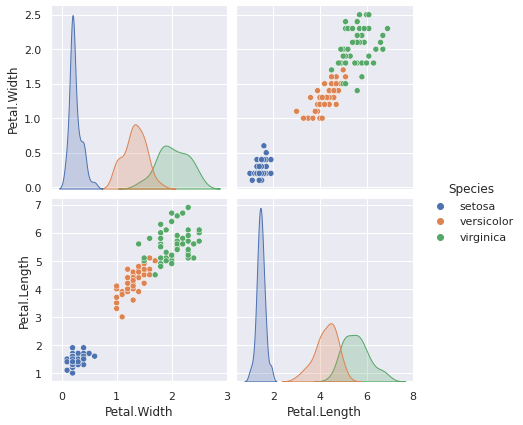

In [29]:
import seaborn as sns
sns.set()
sns.pairplot(df, hue='Species', height=3, vars=["Petal.Width", "Petal.Length"])

# Reading

[Hyperparameters and Model Validation](https://jakevdp.github.io/PythonDataScienceHandbook/05.03-hyperparameters-and-model-validation.html)

# Midterm 

Please refer to the midterm BrightSpace page.